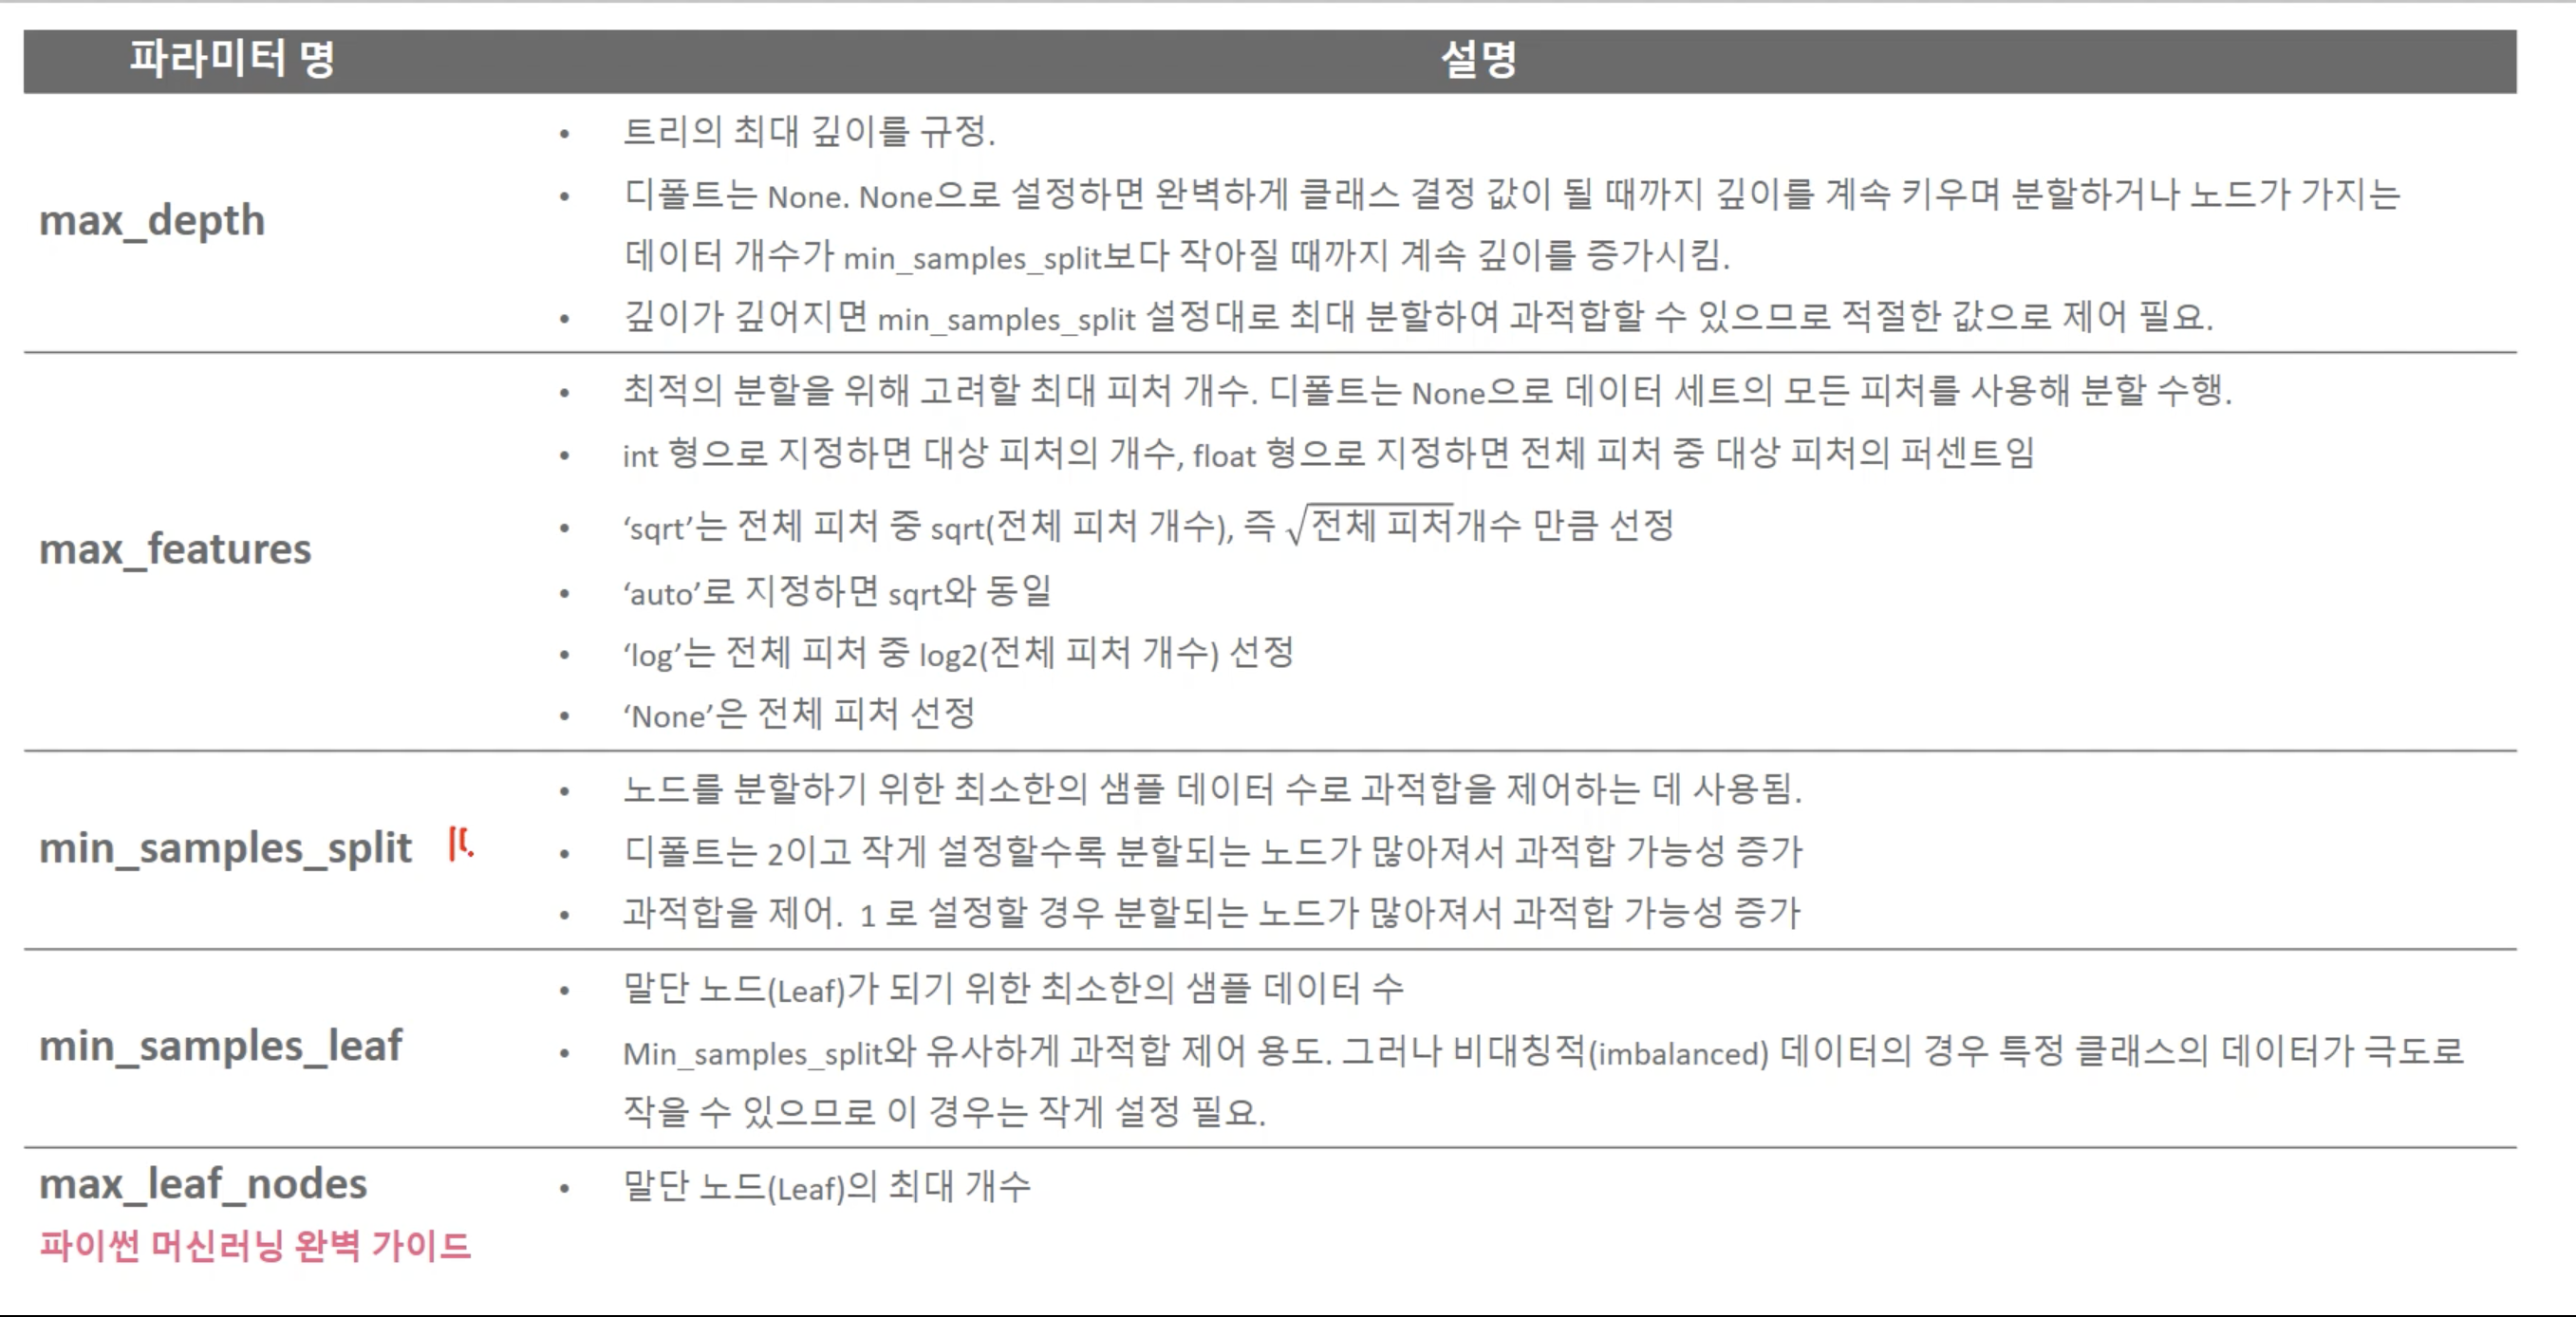

In [4]:
from IPython.display import Image
Image('/Users/younghun/Desktop/영훈/DT_param.png')

# Decision Tree 모델 시각화

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target,
                                                   test_size=0.2,
                                                   random_state=42)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
# graphviz 이용해서 시각화하기
from sklearn.tree import export_graphviz

# export_graphviz로 인해 out_file로 지정된 tree.dot파일을 반환함
export_graphviz(dt_clf, out_file='tree.dot',
               class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,
               impurity=True, filled=True)


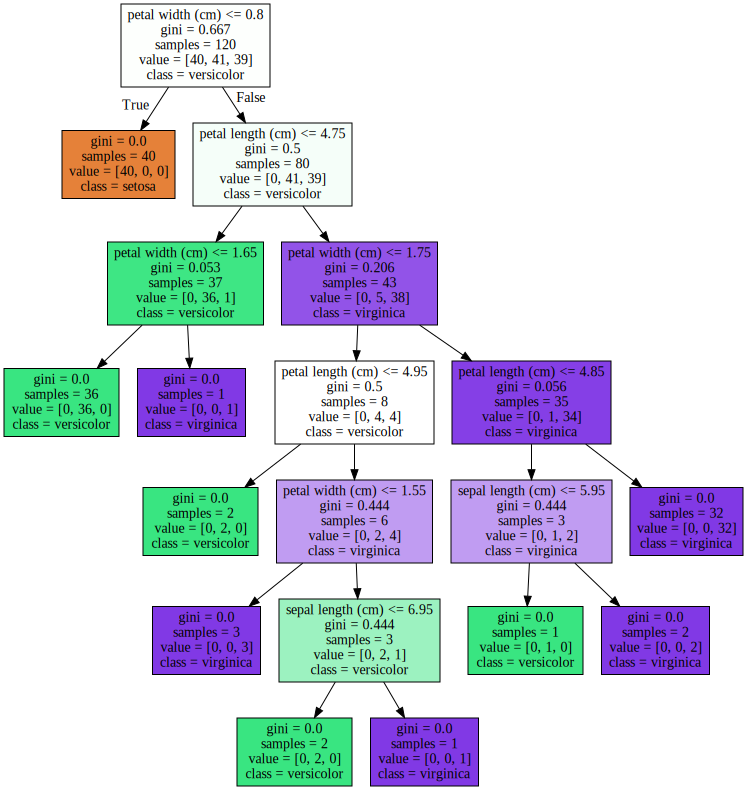

In [8]:
import graphviz

# 위의 cell에서 생성한 tree.dot파일을 읽고 graphviz라이브러리의 Source함수로
# 읽어들인 객체를 인자로 넣어주어 Decision Tree 시각화
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importance : [0.033 0.    0.389 0.577]

sepal length (cm) : 0.033
sepal width (cm) : 0.0
petal length (cm) : 0.389
petal width (cm) : 0.577


<AxesSubplot:>

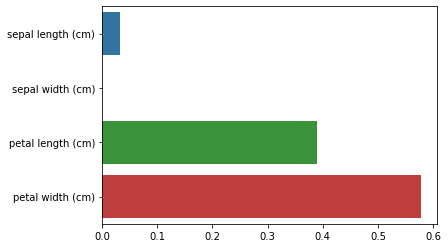

In [18]:
# Decision Tree에서 결정된 feature별 importance 알아보기
import seaborn as sns
import numpy as np

# feature importance 추출 -> 1d array 형태로 반환해줌
print("Feature importance :", np.round(dt_clf.feature_importances_,3))
print()

# feature이름이랑 importance 매핑 시키기
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, ':', np.round(value, 3))
    
# feature importance별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_,
           y=iris_data.feature_names)

# Decision Tree 과적합

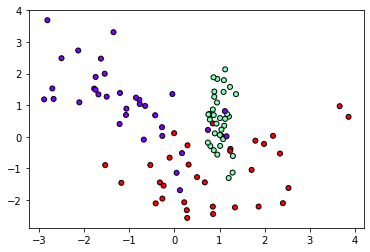

In [28]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 임의의 분류 데이터를 만들기
x_features, y_labels = make_classification(n_features=2,
                                           n_redundant=0,
                                           n_informative=2,
                                           n_classes=3,
                                           n_clusters_per_class=1,
                                           random_state=0)
# 임의로 만든 분류 데이터 시각화
# 색깔이 label, x축, y축이 각 feature
plt.scatter(x_features[:, 0], x_features[:,1],
           marker='o', c=y_labels, s=25, cmap='rainbow',
           edgecolor='k')

In [51]:
### 해당 함수들은 모두 numpy에 속함 ###

# meshgrid함수 예시
a = [1,2,3]
b = [4,5]
A, B = np.meshgrid(a, b)
print(A, B)
print()
# linspace함수 예시
print(np.linspace(0, 100, 10))
print()
# c_ 함수 예시
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print()

# ravel, flatten함수 예시
a = np.array([[1,3,5],
             [6,7,8]])
print(a.ravel())
print(a.flatten())

[[1 2 3]
 [1 2 3]] [[4 4 4]
 [5 5 5]]

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]

[[1 4]
 [2 5]
 [3 6]]

[1 3 5 6 7 8]
[1 3 5 6 7 8]


In [56]:
# 분류기의 Decision boundary를 시각화하는 함수
def visualize_boundary(model, x, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 그리기
    ax.scatter(x[:,0], x[:, 1], c=y, s=25, cmap='rainbow',
              edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # training data로 모델 학습
    model.fit(x,y)
    # meshgird함수는 2차원 좌표값들을 그리드 포인트로 나타내는 과정을 도와줌
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    # linspace 명령이나 logspace 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할
    # linspae(시작, 끝, 개수)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end,
                                    num=200),
                        np.linspace(ylim_start, ylim_end,
                                   num=200))
    # c_ 메서드는 배열의 차원을 증가시킨 후 좌우로 연결한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.
    # 다차원 배열을 무조건 1차원으로 펼치기 위해서는 flatten 나 ravel 메서드를 사용한다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용해 class boundary를 시각화
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes+1) -0.5,
                          cmap='rainbow',
                          clim=(y.min(), y.max()),
                          zorder=1)

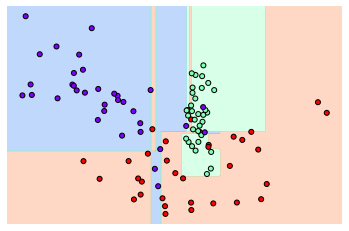

In [57]:
visualize_boundary(dt_clf, x_features, y_labels)

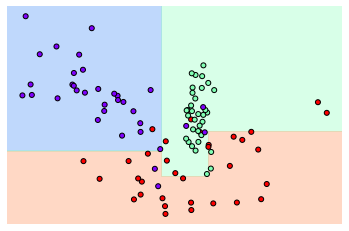

In [59]:
# parameter인 min_samples_leaf를 바꿈으로써 Decision boundary살펴보기
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

# Human activity recognition 실습

In [66]:
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data/UCI HAR Dataset')

In [73]:
import pandas as pd
feature_names_df = pd.read_csv('features.txt',sep='\s+',
                           header=None, names=['column_index','column_name'])
# column name만 추출하고 feature 20개만 보기
feature_names = feature_names_df.iloc[:,1].values.tolist()
feature_names[:20]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X']

In [80]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [82]:
# 데이터 로드하기
def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    # 중복된 칼럼 새롭게 수정
    new_feature_df = get_new_feature_name_df(feature_name_df)
    # feature이름을 변수로 부여하기 위해 리스트 객체로 반환
    feature_name = new_feature_df.iloc[:,1].values.tolist()
    
    x_train = pd.read_csv('./train/X_train.txt',
                         sep='\s+', names=feature_name)
    x_test = pd.read_csv('./test/X_test.txt',
                        sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./train/y_train.txt',
                         sep='\s+', header=None)
    y_test = pd.read_csv('./test/y_test.txt',
                        sep='\s+', header=None)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_human_dataset()

In [84]:
x_train.isnull().sum().sum()

0

In [86]:
# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=43)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f"정확도 :{accuracy: .4f}")

# Decision Tree의 파라미터 종류 출력해보기
print(dt_clf.get_params())

정확도 : 0.8619
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 43, 'splitter': 'best'}


In [88]:
# GridSearchCV 이용해서 최적의 파라미터도 찾으면서 교차검증까지 하기
from sklearn.model_selection import GridSearchCV

# 검사해볼 parameter 사전정의
params = {
    'max_depth':[6,8,10,12]
}

dt_clf = DecisionTreeClassifier()

# n_jobs=-1로 지정해주면 모든 코어를 다 사용하기때문에 컴퓨터는 뜨거워지겠지만, 속도는 많이 빨라집니다. 
# verbose로 log 출력의 level을 조정, metric은 accuracy로 설정
grid_cv = GridSearchCV(dt_clf, param_grid=params,
                      scoring='accuracy', cv=5, verbose=1,
                      n_jobs=-1)
# GridSearchCV로 학습 시작!
grid_cv.fit(x_train, y_train)

print(f"최고 평균 정확도 수치 :{grid_cv.best_score_: .4f}")
print(f"최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.3s finished


최고 평균 정확도 수치 : 0.8545
최적 하이퍼 파라미터 : {'max_depth': 10}


In [89]:
# GridSearchCV에서 파라미터 값에 따른 score 반환해주는 array dataframe으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.114597,0.028527,0.010444,0.000779,6,{'max_depth': 6},0.808294,0.872196,0.817007,0.864626,0.870748,0.846574,0.027951,3
1,2.642713,0.043525,0.009075,0.000382,8,{'max_depth': 8},0.810333,0.831407,0.838095,0.870748,0.906803,0.851477,0.033785,2
2,3.042457,0.068967,0.008509,0.000477,10,{'max_depth': 10},0.828008,0.818491,0.838095,0.886395,0.901361,0.854470,0.033108,1
3,2.980067,0.295760,0.005998,0.000652,12,{'max_depth': 12},0.800816,0.813052,0.828571,0.887075,0.883673,0.842638,0.036002,4


In [90]:
# 위에서 비슷하게 반복문을 돌려 파라미터값에 따른 모델 정확도 출력
max_depths = [6,8,10,12,14,16]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth,
                                   random_state=42)
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"max_depth가 {depth}일 때, 정확도 : {accuracy: .4f}")

max_depth가 6일 때, 정확도 :  0.8544
max_depth가 8일 때, 정확도 :  0.8683
max_depth가 10일 때, 정확도 :  0.8626
max_depth가 12일 때, 정확도 :  0.8643
max_depth가 14일 때, 정확도 :  0.8527
max_depth가 16일 때, 정확도 :  0.8595


In [94]:
# parameter 2개 종류를 설정해서 GridSearchCV 해보기
params = {
    'max_depth':[6,8,10,12],
    'min_samples_split':[18,22]
}
dt_clf = DecisionTreeClassifier()

grid_cv = GridSearchCV(dt_clf, param_grid=params,
                      cv=3, verbose=1, n_jobs=-1,
                       scoring='accuracy')
grid_cv.fit(x_train, y_train)
print(f"최고 평균 정확도 : {grid_cv.best_score_}")
print(f"최적의 파라미터 : {grid_cv.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.4s finished


최고 평균 정확도 : 0.8437143245711177
최적의 파라미터 : {'max_depth': 6, 'min_samples_split': 22}


In [95]:
best_dt_clf = grid_cv.best_estimator_

pred_1 = best_dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred_1)
print(f"최적의 estimator의 정확도 : {accuracy : .4f}")

최적의 estimator의 정확도 :  0.8551


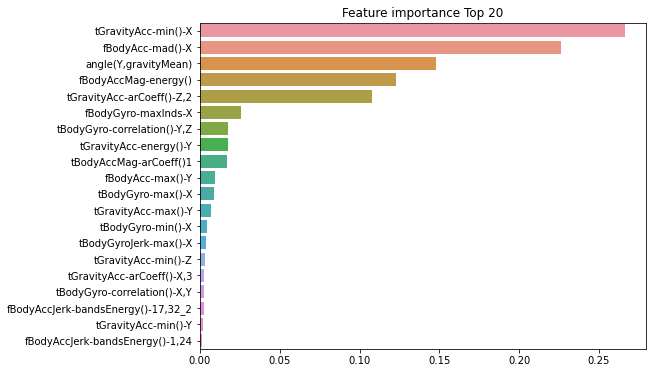

In [99]:
# feature별 importance 그래프로 시각화해보기
feature_import = best_dt_clf.feature_importances_
feature_import_series = pd.Series(feature_import,
                                 index=x_train.columns)
top20 = feature_import_series.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=top20, y=top20.index)
plt.show()